In [1]:
%%time
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from itertools import combinations 
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection


Using TensorFlow backend.
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtype

CPU times: user 2.64 s, sys: 1.06 s, total: 3.7 s
Wall time: 27.3 s


In [15]:
df=pd.read_csv('60s_window.csv',index_col=0)
df.columns.tolist()

['net_acc_mean',
 'net_acc_std',
 'net_acc_min',
 'net_acc_max',
 'ACC_x_mean',
 'ACC_x_std',
 'ACC_x_min',
 'ACC_x_max',
 'ACC_y_mean',
 'ACC_y_std',
 'ACC_y_min',
 'ACC_y_max',
 'ACC_z_mean',
 'ACC_z_std',
 'ACC_z_min',
 'ACC_z_max',
 'BVP_mean',
 'BVP_std',
 'BVP_min',
 'BVP_max',
 'EDA_mean',
 'EDA_std',
 'EDA_min',
 'EDA_max',
 'EDA_phasic_mean',
 'EDA_phasic_std',
 'EDA_phasic_min',
 'EDA_phasic_max',
 'EDA_smna_mean',
 'EDA_smna_std',
 'EDA_smna_min',
 'EDA_smna_max',
 'EDA_tonic_mean',
 'EDA_tonic_std',
 'EDA_tonic_min',
 'EDA_tonic_max',
 'Resp_mean',
 'Resp_std',
 'Resp_min',
 'Resp_max',
 'TEMP_mean',
 'TEMP_std',
 'TEMP_min',
 'TEMP_max',
 'BVP_peak_freq',
 'TEMP_slope',
 'subject',
 'label']

In [16]:
len(df.columns)

48

In [3]:
# df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)
# df.columns.tolist()

['net_acc_mean',
 'net_acc_std',
 'net_acc_min',
 'net_acc_max',
 'ACC_x_mean',
 'ACC_x_std',
 'ACC_x_min',
 'ACC_x_max',
 'ACC_y_mean',
 'ACC_y_std',
 'ACC_y_min',
 'ACC_y_max',
 'ACC_z_mean',
 'ACC_z_std',
 'ACC_z_min',
 'ACC_z_max',
 'BVP_mean',
 'BVP_std',
 'BVP_min',
 'BVP_max',
 'ECG_mean',
 'ECG_std',
 'ECG_min',
 'ECG_max',
 'EDA_mean',
 'EDA_std',
 'EDA_min',
 'EDA_max',
 'EDA_phasic_mean',
 'EDA_phasic_std',
 'EDA_phasic_min',
 'EDA_phasic_max',
 'EDA_smna_mean',
 'EDA_smna_std',
 'EDA_smna_min',
 'EDA_smna_max',
 'EDA_tonic_mean',
 'EDA_tonic_std',
 'EDA_tonic_min',
 'EDA_tonic_max',
 'EMG_mean',
 'EMG_std',
 'EMG_min',
 'EMG_max',
 'Resp_mean',
 'Resp_std',
 'Resp_min',
 'Resp_max',
 'TEMP_mean',
 'TEMP_std',
 'TEMP_min',
 'TEMP_max',
 'c_ACC_x_mean',
 'c_ACC_x_std',
 'c_ACC_x_min',
 'c_ACC_x_max',
 'c_ACC_y_mean',
 'c_ACC_y_std',
 'c_ACC_y_min',
 'c_ACC_y_max',
 'c_ACC_z_mean',
 'c_ACC_z_std',
 'c_ACC_z_min',
 'c_ACC_z_max',
 'c_Temp_mean',
 'c_Temp_std',
 'c_Temp_min',
 '

In [8]:
len(df.columns)

72

In [2]:
# df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)
# df

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,c_ACC_z_min,c_ACC_z_max,c_Temp_mean,c_Temp_std,c_Temp_min,c_Temp_max,BVP_peak_freq,TEMP_slope,subject,label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,-0.8700,0.6110,29.168923,0.064290,28.994568,29.426208,0.081425,-0.000253,2,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,-0.7594,-0.6810,28.886605,0.074846,28.730682,29.207275,0.147017,-0.000161,2,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,-0.7534,-0.6754,28.799659,0.037924,28.679108,28.988800,0.088210,0.000535,2,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,-0.7878,0.1660,28.768865,0.058639,28.584656,29.023285,0.117614,-0.000256,2,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,-0.7202,-0.6570,28.598514,0.068128,28.447449,28.882599,0.151541,0.000260,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0.036762,0.007911,0.000000,0.058485,-0.036741,0.008011,-0.058485,0.008257,-0.000025,5.512148e-06,...,-0.9478,-0.7038,33.943786,0.026213,33.808136,34.097076,0.119876,-0.000075,17,3
781,0.032120,0.005324,0.001376,0.055732,-0.032117,0.005343,-0.055732,0.002752,-0.000022,3.676049e-06,...,-0.9446,-0.7414,33.939625,0.025553,33.753479,34.144348,0.065592,-0.000117,17,3
782,0.026901,0.000517,0.024770,0.028210,-0.026901,0.000517,-0.028210,-0.024770,-0.000019,3.554577e-07,...,-0.9718,-0.7698,34.002778,0.034897,33.864288,34.191650,0.108567,0.000454,17,3


In [17]:
features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)


46


47

In [18]:
sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,Resp_min,Resp_max,TEMP_mean,TEMP_std,TEMP_min,TEMP_max,BVP_peak_freq,TEMP_slope,subject,label
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,-8.805847,6.742859,35.807285,0.024986,35.750000,35.870000,0.081425,-0.000253,2.000000,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,-2.914429,3.730774,35.706833,0.024641,35.660000,35.750000,0.147017,-0.000161,2.000000,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,-3.242493,3.450012,35.775430,0.037082,35.710000,35.840000,0.088210,0.000535,2.000000,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,-6.646729,5.216980,35.830724,0.025266,35.770000,35.890000,0.117614,-0.000256,2.000000,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,-2.777100,3.028870,35.798869,0.020909,35.770000,35.840000,0.151541,0.000260,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.042130,0.000328,0.040968,0.043696,-0.039802,0.000328,-0.041346,-0.038618,-0.000027,2.254555e-07,...,-10.510088,8.729651,31.505537,0.015360,31.483510,31.544919,0.164873,-0.000189,11.176097,3
1244,0.039764,0.000271,0.039219,0.039907,0.039764,0.000271,0.039219,0.039907,0.000027,1.862190e-07,...,-9.202333,7.398872,33.696923,0.019939,33.660000,33.741212,0.131407,-0.000133,13.000000,3
1245,0.041990,0.000231,0.039308,0.043921,0.003807,0.000231,0.001499,0.006112,0.000003,1.590967e-07,...,-8.508980,6.769601,33.929413,0.014302,33.889531,33.958050,0.142617,-0.000093,9.166227,3
1246,0.040894,0.000132,0.040569,0.041733,0.040894,0.000132,0.040569,0.041733,0.000028,9.076908e-08,...,-8.100251,8.296914,32.774272,0.021280,32.740925,32.847081,0.137624,0.000187,5.346098,3


In [19]:
for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
p_d=pd.read_csv('personal_detail.csv',index_col=0)

In [21]:
df_new_1=df_new.merge(p_d,on='subject')
df_new_1

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,label,age,height,weight,gender_ female,coffee_today_YES,sport_today_YES,smoker_YES,feel_ill_today_YES,bmi
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,0,27,175,80,0,0,0,0,0,1
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,0,27,175,80,0,0,0,0,0,1
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,0,27,175,80,0,0,0,0,0,1
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,0,27,175,80,0,0,0,0,0,1
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,0,27,175,80,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.029484,0.002074,0.020918,0.053804,-0.004624,0.002074,-0.015439,0.017447,-0.000003,1.427082e-06,...,1,29,165,55,1,0,0,0,0,0
1244,0.032744,0.000516,0.029211,0.034857,-0.029334,0.000516,-0.031478,-0.025832,-0.000020,3.552867e-07,...,2,29,165,55,1,0,0,0,0,0
1245,0.030006,0.007051,0.002966,0.070357,-0.027424,0.007051,-0.067796,-0.000404,-0.000019,4.851210e-06,...,2,29,165,55,1,0,0,0,0,0
1246,0.031250,0.001534,0.027188,0.038575,-0.031250,0.001534,-0.038575,-0.027188,-0.000022,1.055452e-06,...,2,29,165,55,1,0,0,0,0,0


In [22]:
df_new_1['label'].value_counts()

3    312
2    312
1    312
0    312
Name: label, dtype: int64

In [23]:
features=df_new_1.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)
features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

55


56

In [24]:
train=df_new_1[df_new_1['subject']<=9]
test=df_new_1[df_new_1['subject']>9]

In [25]:
scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[feature])
scaled_data_test = scaler.transform(test[feature])

In [26]:
et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=56)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)

In [27]:
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       147
           1       0.89      0.90      0.90       161
           2       0.55      0.59      0.57       147
           3       0.71      0.75      0.73       150

    accuracy                           0.73       605
   macro avg       0.73      0.72      0.73       605
weighted avg       0.73      0.73      0.73       605



# RFECV

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


In [29]:
rfecv = RFECV(estimator=et, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(scaled_data_train,train['label'])


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=10,
                                     oob_score=False, random_state=56,
                                     verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [30]:
print('Optimal number of features: {}'.format(rfecv.n_features_))


Optimal number of features: 26


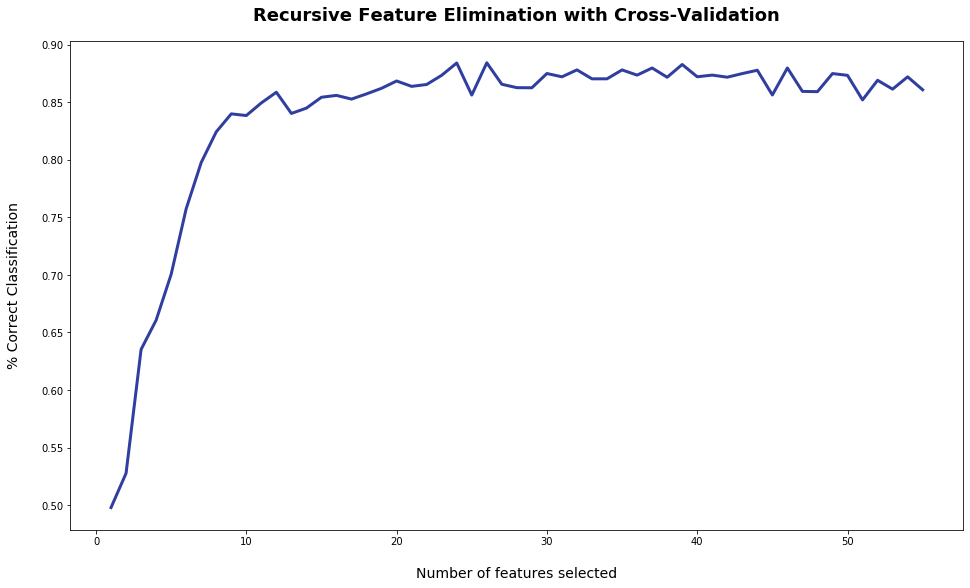

In [31]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [32]:
print(np.where(rfecv.support_ == False)[0])

X = pd.DataFrame(data=scaled_data_train)
X             
X_test =  pd.DataFrame(data=scaled_data_test)

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 3  6  8  9 10 11 12 13 14 15 16 19 21 23 26 30 33 36 39 40 42 45 48 49
 50 51 52 53 54]


In [33]:
et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=56)
et.fit(X,train['label'])
y_pred=et.predict(X_test)

In [34]:
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.84      0.58      0.69       147
           1       0.76      0.93      0.83       161
           2       0.52      0.65      0.58       147
           3       0.69      0.57      0.62       150

    accuracy                           0.69       605
   macro avg       0.70      0.68      0.68       605
weighted avg       0.70      0.69      0.68       605



In [42]:
for i in range (201):
    #print (i)
    et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=i)
    et.fit(X,train['label'])
    y_pred=et.predict(X_test)
    #print(classification_report(test['label'],y_pred))
    if ((classification_report(test['label'],y_pred,output_dict=True)['0']['recall'])>.60 and (classification_report(test['label'],y_pred,output_dict=True)['2']['recall'])>.60 and (classification_report(test['label'],y_pred,output_dict=True)['3']['recall'])>.60):
        print(i)
        print(classification_report(test['label'],y_pred))

2
              precision    recall  f1-score   support

           0       0.80      0.64      0.71       147
           1       0.74      0.91      0.82       161
           2       0.57      0.62      0.59       147
           3       0.70      0.61      0.65       150

    accuracy                           0.70       605
   macro avg       0.70      0.69      0.69       605
weighted avg       0.70      0.70      0.70       605

13
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       147
           1       0.78      0.93      0.84       161
           2       0.53      0.63      0.58       147
           3       0.69      0.61      0.65       150

    accuracy                           0.70       605
   macro avg       0.72      0.70      0.70       605
weighted avg       0.72      0.70      0.70       605

14
              precision    recall  f1-score   support

           0       0.81      0.61      0.69       147
           1 

115
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       147
           1       0.80      0.93      0.86       161
           2       0.59      0.69      0.64       147
           3       0.76      0.68      0.72       150

    accuracy                           0.74       605
   macro avg       0.74      0.73      0.73       605
weighted avg       0.75      0.74      0.74       605

116
              precision    recall  f1-score   support

           0       0.81      0.61      0.69       147
           1       0.79      0.94      0.86       161
           2       0.58      0.65      0.61       147
           3       0.75      0.69      0.72       150

    accuracy                           0.73       605
   macro avg       0.73      0.72      0.72       605
weighted avg       0.73      0.73      0.72       605

119
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       147
         

# STACKED

In [35]:
classification_report(test['label'],y_pred,output_dict = True)['accuracy']

0.6859504132231405

In [43]:
rnd_st = []
for i in range (501):
    et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=i ,)
    et.fit(scaled_data_train,train['label'])
    y_pred=et.predict(scaled_data_test)
    if ((classification_report(test['label'],y_pred,output_dict=True)['0']['recall'])>.60 and (classification_report(test['label'],y_pred,output_dict=True)['2']['recall'])>.60 and (classification_report(test['label'],y_pred,output_dict=True)['3']['recall'])>.60 and (classification_report(test['label'],y_pred,output_dict=True)['accuracy'])>.72):
        print(i)
        rnd_st.append(i)

7
36
38
42
65
110
119
140
162
195
199
217
226
231
242
275
293
311
312
314
321
359
376
392
395
398
402
409
461
483


In [44]:
clf = []
for st in rnd_st:
    clf.append(ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=st))
    

In [ ]:
# Stacked random state:
# 72
# 86
# 235
# 388
# 396

for i in range (500):
    meta = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=i)
    sclf = StackingClassifier(classifiers=clf, meta_classifier=meta)
    sclf.fit(scaled_data_train,train['label'])
    y_pred_sta=sclf.predict(scaled_data_test)
    if (classification_report(test['label'],y_pred_sta,output_dict=True)['accuracy']>.72):
        print (i)
        print(classification_report(test['label'],y_pred_sta))

0
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       147
           1       0.82      0.93      0.87       161
           2       0.58      0.61      0.60       147
           3       0.73      0.69      0.71       150

    accuracy                           0.73       605
   macro avg       0.73      0.73      0.73       605
weighted avg       0.73      0.73      0.73       605

1
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       147
           1       0.83      0.93      0.88       161
           2       0.59      0.63      0.61       147
           3       0.74      0.71      0.72       150

    accuracy                           0.74       605
   macro avg       0.73      0.73      0.73       605
weighted avg       0.74      0.74      0.73       605

2
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       147
           1   

19
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       147
           1       0.83      0.93      0.88       161
           2       0.57      0.63      0.60       147
           3       0.73      0.69      0.71       150

    accuracy                           0.73       605
   macro avg       0.73      0.72      0.72       605
weighted avg       0.73      0.73      0.73       605

20
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       147
           1       0.83      0.93      0.87       161
           2       0.59      0.61      0.60       147
           3       0.73      0.70      0.72       150

    accuracy                           0.73       605
   macro avg       0.73      0.73      0.73       605
weighted avg       0.73      0.73      0.73       605

21
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       147
           1

38
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       147
           1       0.83      0.94      0.88       161
           2       0.59      0.62      0.60       147
           3       0.74      0.71      0.72       150

    accuracy                           0.74       605
   macro avg       0.73      0.73      0.73       605
weighted avg       0.74      0.74      0.73       605

39
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       147
           1       0.82      0.93      0.87       161
           2       0.59      0.63      0.61       147
           3       0.74      0.69      0.71       150

    accuracy                           0.73       605
   macro avg       0.73      0.73      0.73       605
weighted avg       0.73      0.73      0.73       605

40
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       147
           1

57
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       147
           1       0.82      0.93      0.87       161
           2       0.58      0.61      0.60       147
           3       0.73      0.70      0.72       150

    accuracy                           0.73       605
   macro avg       0.73      0.73      0.73       605
weighted avg       0.73      0.73      0.73       605

58
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       147
           1       0.84      0.93      0.88       161
           2       0.59      0.63      0.61       147
           3       0.74      0.71      0.72       150

    accuracy                           0.74       605
   macro avg       0.74      0.73      0.73       605
weighted avg       0.74      0.74      0.74       605

59
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       147
           1